In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd

SONY_DIR = '/content/drive/My Drive/Colab Notebooks/SIGNATE/ソニーグループ合同 データ分析コンペティション'

# 学習用データ
X_train = np.load(os.path.join(SONY_DIR, 'X_train.npy'))

# 評価用データ
X_test = np.load(os.path.join(SONY_DIR, 'X_test.npy'))

# 学習用データのアノテーション
y_train = np.load(os.path.join(SONY_DIR, 'y_train.npy'))

# 投稿用サンプルファイル
sample_df = pd.read_csv(os.path.join(SONY_DIR, 'sample_submit.csv'))

In [3]:
import matplotlib.pyplot as plt

def maesyori(data):
  image = data.reshape(20, 20)

  copy_image = np.zeros((20, 20), dtype=np.uint8)
  for i in range(20):
    for j in range(20):
      ap = image[i][j]
      tmp = []
      if i == 0 and j == 0:
        tmp.append(image[i+1][j])
        tmp.append(image[i][j+1])
        tmp.append(image[i+1][j+1])

      elif i == 0 and j== 19:
        tmp.append(image[i+1][j])
        tmp.append(image[i][j-1])
        tmp.append(image[i+1][j-1])

      elif i == 19 and j== 0:
        tmp.append(image[i-1][j])
        tmp.append(image[i][j+1])
        tmp.append(image[i-1][j+1])

      elif i == 19 and j== 19:
        tmp.append(image[i-1][j])
        tmp.append(image[i][j-1])
        tmp.append(image[i-1][j-1])

      elif i == 0:
        tmp.append(image[i+1][j])
        tmp.append(image[i][j+1])
        tmp.append(image[i+1][j+1])
        tmp.append(image[i][j-1])
        tmp.append(image[i+1][j-1])

      elif i == 19:
        tmp.append(image[i-1][j])
        tmp.append(image[i][j+1])
        tmp.append(image[i-1][j+1])
        tmp.append(image[i][j-1])
        tmp.append(image[i-1][j-1])

      elif j == 0:
        tmp.append(image[i+1][j])
        tmp.append(image[i][j+1])
        tmp.append(image[i+1][j+1])
        tmp.append(image[i-1][j])
        tmp.append(image[i-1][j+1])

      elif j == 19:
        tmp.append(image[i+1][j])
        tmp.append(image[i][j-1])
        tmp.append(image[i+1][j-1])
        tmp.append(image[i-1][j])
        tmp.append(image[i-1][j-1])

      else:
        tmp.append(image[i+1][j])
        tmp.append(image[i-1][j])
        tmp.append(image[i][j+1])
        tmp.append(image[i][j-1])
        tmp.append(image[i+1][j+1])
        tmp.append(image[i+1][j-1])
        tmp.append(image[i-1][j+1])
        tmp.append(image[i-1][j-1])


      if ap < min(tmp) or ap <= 80:
        copy_ap = 0
      else:
        copy_ap = 255

      copy_image[i][j] = copy_ap
  return copy_image

[[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1]
 [  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
    1   1]
 [  1   1   1   1   1  34   9   2   1   1   1   1   1   1   1   1   1   1
    1   1]
 [  1   1   1   1   2 255 255 176 255   2 124  10   1   1   1   1   1   1
    1   1]
 [  1   1   1   1   7 255 255 255 255 255 247 250  52   1   1   1   1   1
    1   1]
 [  1   1   1   1   1 255 255 255 255  92   5 255  21   1   1   1   1   1
    1   1]
 [  1   1   1   1  93 255 255 255 255 182 158 255   1   1   1   1   1   1
    1   1]
 [  1   1   1   1 182 157   1 255 255 255 255 209   1   1   1   1   1   1
    1   1]
 [  1   1   1  13 255  16 109 255 255  99 255 104 173 200 116  13   1  13
    1   1]
 [  1   1   1 255 255 245 255 255 255   5 202  35  65 255 255 255

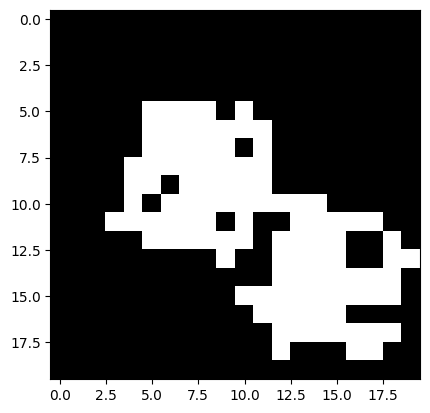

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1  34   9   2   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2 255 255 176
 255   2 124  10   1   1   1   1   1   1   1   1   1   1   1   1   7 255
 255 255 255 255 247 250  52   1   1   1   1   1   1   1   1   1   1   1
   1 255 255 255 255  92   5 255  21   1   1   1   1   1   1   1   1   1
   1   1  93 255 255 255 255 182 158 255   1   1   1   1   1   1   1   1
   1   1   1   1 182 157   1 255 255 255 255 209   1   1   1   1   1   1
   1   1   1   1   1  13 255  16 109 255 255  99 255 104 173 200 116  13
   1  13   1   1   1   1   1 255 255 245 255 255 255   5 202  35  65 255
 255 255 255 209   1   1   1   1   1   1   1 169 25

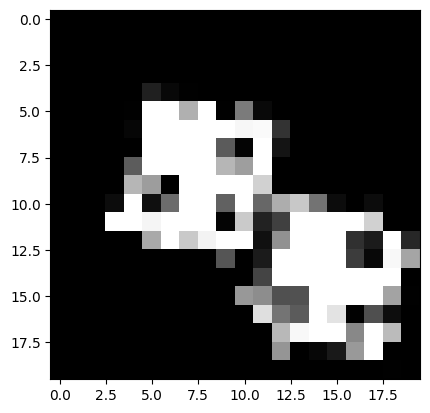

[[  0   0  37   0   0   0   0   7  40   0   0   6  43   0  13   0   0   0
    0  21]
 [  0   3  39   0   0   0   0   0   0  58   0  21   0   0   0   0   0   0
   49   0]
 [  0   1   0   0  55   0  16 207   0   0   0   1  10  19   0   0  54   0
    0   0]
 [  0   0   0   0   3   7 255 255 112   0   0   0   0   0   0   0   0   9
   15   0]
 [  0   0   1   0  13 255 255 255 255 123   0   0   0   0   0   0   0   0
    1   0]
 [  0   0   7 255 255 255 255 255 255 255   4  18   0   0   0   0   0   0
    0   0]
 [ 12   6 207 255   1 250 255 255 255 255 255  18   0   0   0   0   6   0
    0   0]
 [  0   0 105 234  16 145 255 255 255   0 250 105   0   0   0   0  22   0
    0  22]
 [  0  28  58 255 255  61 255 255 139  52 255 249   0  55   9   0   0  15
    0   0]
 [  0   0   0   4 255 255 255 255 255 255 114 111   0   0   0   0   0  31
    0   0]
 [  0  49  27   0 228 255 255 255 223  24   0   0   0   0  31  16   0  28
    0   0]
 [ 24   3   0   0   7 255 255 183  15   0   0   0  13   0  30  13

In [4]:
import matplotlib.pyplot as plt

#num = 123746

num = 98

print(X_train[num].reshape(20, 20))

image = X_train[num]
#image = X_test[num]
copy_image = maesyori(image)

plt.imshow(copy_image, cmap='gray')
plt.show()

print(X_train[num])


plt.imshow(image.reshape(20, 20), cmap='gray')
plt.show()

print(X_test[num].reshape(20, 20))

print(y_train[num])

In [5]:

def find_dice_regions(data, threshold):
    image = data

    dice_images = []
    r_list = []
    c_list = []

    for i in range(2):  # サイコロの最大数を3と仮定します
        max_sum = 0
        max_region = None

        for r in range(11):  # 20x20画像から10x10の領域を精査
            for c in range(11):
                region = image[r+1:r+9, c+1:c+9]
                region_sum = np.sum(region)

                if region_sum > max_sum:
                    max_sum = region_sum
                    max_region = region.copy()
                    max_r, max_c = r, c

        if max_sum >= threshold:
            dice_images.append(image[max_r:max_r+10, max_c:max_c+10])
            r_list.append(max_r)
            c_list.append(max_c)
            image[max_r:max_r+10, max_c:max_c+10] = 0  # 切り抜いた領域を0に置き換える

        else:
          break

    return dice_images, r_list, c_list
# サイコロの領域を切り抜く
#data = X_train[num].reshape(20, 20)

#cropped_dices, r_list, c_list = find_dice_regions(copy_image, 5000)

# 切り抜いた画像を出力
#for i, dice in enumerate(cropped_dices):
    #print(f"Dice {i+1}:\n", dice)
#for i in range(len(r_list)):
    #r = r_list[i]
    #c = c_list[i]
    #tmp_img = image.reshape(20, 20)[r:r+10, c:c+10]
    #plt.imshow(tmp_img, cmap='gray')  # 'gray'はカラーマップの例です
    #plt.show()



In [ ]:
X_train_1 = []
y_train_1 = []
X_train_2 = []
y_train_2 = []

for index, X in enumerate(X_train):
    image = X
    copy_image = maesyori(image)
    cropped_dices, r_list, c_list = find_dice_regions(copy_image, 3000)
    if len(cropped_dices) == 1:
        r = r_list[0]
        c = c_list[0]
        tmp_img = image.reshape(20, 20)[r:r+10, c:c+10]
        X_train_1.append(tmp_img)
        y_train_1.append(y_train[index])
        if y_train[index] > 6:
            print("error : ", index)
            plt.imshow(tmp_img, cmap='gray')
            plt.show()

    else:
        X_train_2.append(image)
        y_train_2.append(y_train[index])

    if (index+1) % 10000 == 0:
        print( index + 1, "/", len(X_train))

np.save(os.path.join(SONY_DIR, 'X_train_1.npy'), X_train_1)
np.save(os.path.join(SONY_DIR, 'y_train_1.npy'), y_train_1)
np.save(os.path.join(SONY_DIR, 'X_train_2.npy'), X_train_2)
np.save(os.path.join(SONY_DIR, 'y_train_2.npy'), y_train_2)

10000 / 200000
20000 / 200000
30000 / 200000
40000 / 200000
50000 / 200000
60000 / 200000
70000 / 200000
80000 / 200000
90000 / 200000
100000 / 200000
110000 / 200000
120000 / 200000
130000 / 200000
140000 / 200000
150000 / 200000
160000 / 200000
170000 / 200000
180000 / 200000
190000 / 200000
200000 / 200000


In [6]:
# load

X_train_1 = np.load(os.path.join(SONY_DIR, 'X_train_1.npy'))
y_train_1 = np.load(os.path.join(SONY_DIR, 'y_train_1.npy'))
X_train_2 = np.load(os.path.join(SONY_DIR, 'X_train_2.npy'))
y_train_2 = np.load(os.path.join(SONY_DIR, 'y_train_2.npy'))

In [7]:
print(len(X_train_2))

100114


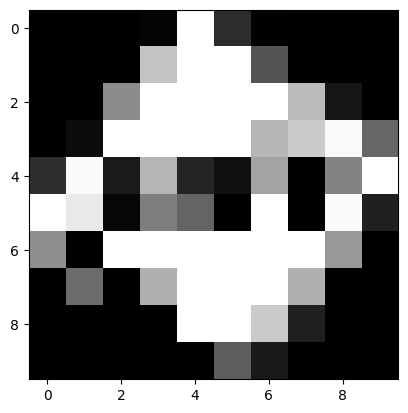

3


In [8]:
num = 7643
plt.imshow(X_train_1[num], cmap='gray')
plt.show()
print(y_train_1[num])

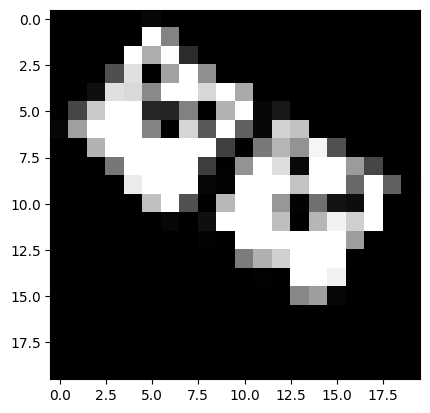

10


In [9]:
num = 53874
plt.imshow(X_train_2[num].reshape(20, 20), cmap='gray')
plt.show()
print(y_train_2[num])

In [10]:
print(y_train_2)

[ 6 10  7 ...  5  8 10]


In [11]:
def shift_image(image):
    image_list = []
    for i in range(2):
        for j in range(2):
            shift_cols = 0
            shift_rows = 0
            tmp_image = image

            if i == 0:
                # 左端から精査して行き、条件を満たす場合に列を追加
                for k in range(20):
                    if np.all(image[:, k] <= 10):
                        shift_cols -= 1
                    else:
                        break
            else:
                # 右端から精査して行き、条件を満たす場合に列を追加
                for k in range(19, 0, -1):
                    if np.all(image[:, k] <= 10):
                        shift_cols += 1
                    else:
                        break

            if j == 0:
                # 上端から精査して行き、条件を満たす場合に行を追加
                for k in range(20):
                    if np.all(image[k, :] <= 10):
                        shift_rows -= 1
                    else:
                        break

            else:
                # 下端から精査して行き、条件を満たす場合に行を追加
                for k in range(19, 0, -1):
                    if np.all(image[k, :] <= 10):
                        shift_rows += 1
                    else:
                        break

            shifted_image = np.roll(tmp_image, shift=(shift_rows, shift_cols), axis=(0, 1))
            #plt.imshow(shifted_image.reshape(20, 20), cmap='gray')
            #plt.show()

            image_list.append(shifted_image)

    return image_list

In [12]:
def replace_with_dice(image, dice_image):
    return_image = []
    result_image = np.copy(image)
    # 20x20の画像を10x10の領域ごとに調査
    judge = 0
    for i in range(11):
        if judge == 1:
            break
        for j in range(11):
            # 10x10の領域を取得
            subimage = image[i:i+10, j:j+10]

            # 10x10の領域がすべて20以下の場合に差し替える
            if np.all(subimage <= 20):
                result_image[i:i+10, j:j+10] = dice_image
                return_image = result_image
                judge = 1
                break

    return return_image

In [ ]:
i = 0

X_train_3 = []
y_train_3 = []

for index, Xt_image in enumerate(X_train_2):
    image_list = shift_image(Xt_image.reshape(20, 20))
    for image in image_list:
        image_3 = replace_with_dice(image, X_train_1[i])
        if len(image_3) != 0:
            rabel = y_train_1[i] + y_train_2[index]
            X_train_3.append(image_3)
            y_train_3.append(rabel)

            i += 1

            if len(y_train_1) <= i:
                i = 0
    if (index+1) % 10000 == 0:
        print( index + 1, "/", len(X_train_2), "  num_image : ", len(X_train_3))

np.save(os.path.join(SONY_DIR, 'X_train_3.npy'), X_train_3)
np.save(os.path.join(SONY_DIR, 'y_train_3.npy'), y_train_3)

10000 / 100114   num_image :  23672
20000 / 100114   num_image :  47391
30000 / 100114   num_image :  70907
40000 / 100114   num_image :  94462
50000 / 100114   num_image :  118089
60000 / 100114   num_image :  141569
70000 / 100114   num_image :  165177
80000 / 100114   num_image :  188714
90000 / 100114   num_image :  212392
100000 / 100114   num_image :  236055


In [13]:
X_train_3 = np.load(os.path.join(SONY_DIR, 'X_train_3.npy'))
y_train_3 = np.load(os.path.join(SONY_DIR, 'y_train_3.npy'))

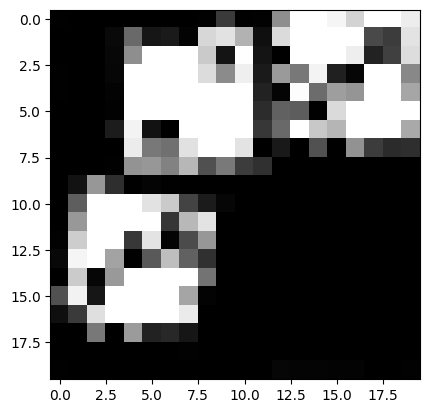

8


In [14]:
num = 100002
plt.imshow(X_train_3[num], cmap='gray')
plt.show()
print(y_train_3[num])

In [15]:
X_train = np.load(os.path.join(SONY_DIR, 'X_train.npy'))
y_train = np.load(os.path.join(SONY_DIR, 'y_train.npy'))

X_train_3 = np.load(os.path.join(SONY_DIR, 'X_train_3.npy'))
y_train_3 = np.load(os.path.join(SONY_DIR, 'y_train_3.npy'))

print(len(X_train))
print(len(X_train_3))

train_data_1 = [x.reshape(20, 20) for x in X_train]

train_data_1.extend(X_train_3)
label_data_1 = y_train.tolist()
label_data_1.extend(y_train_3.tolist())
print(len(train_data_1))
print(len(label_data_1))

200000
236307
436307
436307


In [16]:
seed = 42
np.random.seed(seed)

# シャッフル用のインデックスを作成
indices = np.random.permutation(len(np.array(train_data_1)))

# 配列をシャッフル
train_data_1s = np.array(train_data_1)[indices]
label_data_1s = np.array(label_data_1)[indices]

In [28]:
from collections import Counter

def count_elements(arr):
    return Counter(arr)

result = count_elements(label_data_1s)
print(result)

Counter({6: 41750, 9: 38263, 10: 37816, 8: 37026, 11: 35177, 5: 34570, 7: 33263, 12: 29981, 4: 28357, 3: 23193, 13: 22797, 2: 19200, 1: 16756, 14: 16201, 15: 10819, 16: 6690, 17: 3335, 18: 1113})


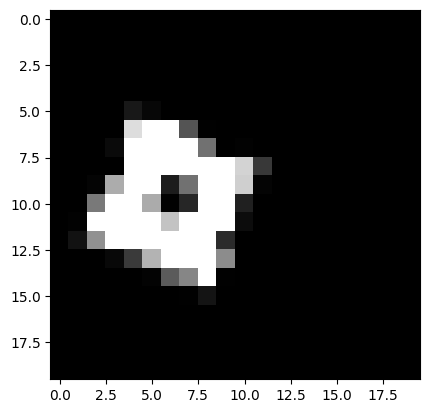

1


In [25]:
num = 436301
plt.imshow(train_data_1s[num], cmap='gray')
plt.show()
print(label_data_1s[num])

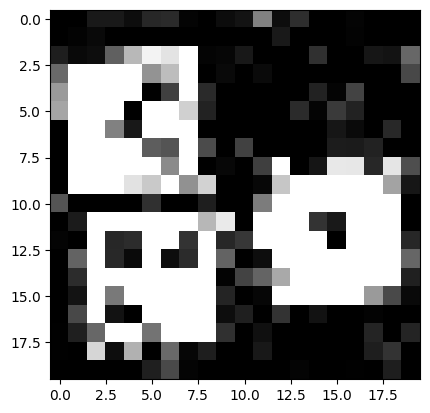

In [26]:
test_num = 6452

plt.imshow(X_test[test_num].reshape(20, 20), cmap='gray')
plt.show()

In [30]:
import torch
import pathlib
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class Dataset(Dataset):
  def __init__(self, X_train, y_train):
    self.x_train = X_train
    self.y_train = y_train

  def __getitem__(self, index):

    y = []
    num = self.y_train[index]
    for i in range(18):
      if i == num - 1:
        y.append(1)
      else:
        y.append(0)

    return torch.tensor([self.x_train[index]]), torch.tensor(y)

  def __len__(self):
    return len(self.x_train)

dataset = Dataset(train_data_1s, label_data_1s)

data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

data_iter = iter(data_loader)
images, labels = next(data_iter)

print(images)
print(labels)

tensor([[[[  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          ...,
          [  1,  58,  21,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1]]],


        [[[  1,   1,   1,  ...,  34,  29,   1],
          [  1,   1,   1,  ..., 194, 141,   1],
          [  1,   1,   1,  ..., 255, 254,   1],
          ...,
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1]]],


        [[[  1,   5,   1,  ...,   1,   1,   1],
          [  1,  80, 231,  ..., 143,   1,   1],
          [  1,  81, 175,  ...,   1,   1,   1],
          ...,
          [  1, 227, 255,  ...,   1,   1,   1],
          [  1, 211,  15,  ...,   1,   1,   1],
          [  1,   1,   1,  ...,   1,   1,   1]]],


        ...,


        [[[  1,   1,   1,  ...,   1,   1,   1],
          [  1, 

In [31]:
# data

# データの数
data_size = len(train_data_1s)

# 分割する割合 (例: 80%を訓練用、20%を検証用)
train_ratio = 0.9
train_size = int(data_size * train_ratio)
val_size = data_size - train_size

# データをランダムにシャッフル
indices = torch.randperm(data_size)
print(len(indices))

# シャッフルされたインデックスを使ってデータを分割
train_indices = indices[:train_size]
val_indices = indices[train_size:]
print(len(train_indices))
print(len(val_indices))

# 分割されたデータを作成
X_train_split = train_data_1s[train_indices]
y_train_split = label_data_1s[train_indices]

X_val_split = train_data_1s[val_indices]
y_val_split = label_data_1s[val_indices]

436307
392676
43631


In [32]:
# dataloader

train_dataset = Dataset(X_train_split, y_train_split)
test_dataset = Dataset(X_val_split, y_val_split)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [33]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.l1 = nn.Linear(20 * 20, 64) # 入力層から隠れ層への設定
    self.l2 = nn.Linear(64, 128)
    self.l3 = nn.Linear(128, 64)
    self.l4 = nn.Linear(64, 12) # 隠れ層から出力層への設定

  def forward(self, x):
    x = self.l1(x)
    x = self.l2(x)
    x = self.l3(x)
    x = self.l4(x)
    return x

# model
model = SimpleNet()
model.cuda()
print(model)

SimpleNet(
  (l1): Linear(in_features=400, out_features=64, bias=True)
  (l2): Linear(in_features=64, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=12, bias=True)
)


In [45]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 1)
        self.fc1 = nn.Linear(64 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 18)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool1(x)
        x = self.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.relu(self.conv3(x))
        x = self.pool3(x)
        x = x.view(-1, 64 * 4 * 4)  # Flatten the feature maps
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


# モデルのインスタンス化
model = CNN()
model.cuda()
print(model)

CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=18, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
)


In [47]:
model_path = 'CNN_model_18_weight.pth'
model.load_state_dict(torch.load(os.path.join(SONY_DIR, model_path)))

<All keys matched successfully>

In [48]:
import torch.optim as optim
from torch.optim import lr_scheduler

loss_fnc = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)
scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# 損失のログ
record_loss_train = []
record_loss_test = []

# 学習
for i in range(20):  # 20エポック学習
    model.train()  # 学習モード
    loss_train = 0
    for j, (x, t) in enumerate(train_loader):  # ミニバッチ(x, t)を取り出す
        x, t = x.float().cuda(), t.float().cuda()  # GPU対応
        y = model(x)
        loss = loss_fnc(y, t)
        loss_train += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_train /= j+1
    record_loss_train.append(loss_train)

    model.eval()  # 評価モード
    loss_test = 0
    for j, (x, t) in enumerate(test_loader):  # ミニバッチ(x, t)を取り出す
        x, t = x.float().cuda(), t.float().cuda()
        y = model(x)
        loss = loss_fnc(y, t)
        loss_test += loss.item()
    loss_test /= j+1
    record_loss_test.append(loss_test)

    if i%1 == 0:
        print("Epoch:", i, "Loss_Train:", loss_train, "Loss_Test:", loss_test)

Epoch: 0 Loss_Train: 0.08819172039925215 Loss_Test: 0.0528466118208769
Epoch: 1 Loss_Train: 0.08228917153270775 Loss_Test: 0.05258533477908153
Epoch: 2 Loss_Train: 0.08040311797103854 Loss_Test: 0.05314218125651219
Epoch: 3 Loss_Train: 0.07791955063679296 Loss_Test: 0.05260179797375214
Epoch: 4 Loss_Train: 0.07715132442642078 Loss_Test: 0.05283920885551218
Epoch: 5 Loss_Train: 0.07588374305964536 Loss_Test: 0.05283533605112615
Epoch: 6 Loss_Train: 0.07507805511587017 Loss_Test: 0.05256121302886574
Epoch: 7 Loss_Train: 0.07411568507390046 Loss_Test: 0.05221054010104137
Epoch: 8 Loss_Train: 0.07408397835993537 Loss_Test: 0.05305856905974546
Epoch: 9 Loss_Train: 0.07292261152182775 Loss_Test: 0.052669321806299775
Epoch: 10 Loss_Train: 0.07301445102246722 Loss_Test: 0.052969015965578244
Epoch: 11 Loss_Train: 0.07266467865418359 Loss_Test: 0.05331277948189008
Epoch: 12 Loss_Train: 0.072016950023638 Loss_Test: 0.052310343097695326
Epoch: 13 Loss_Train: 0.07149027957184989 Loss_Test: 0.052214

In [49]:
torch.save(model.state_dict(), os.path.join(SONY_DIR, 'CNN_model_18_weight.pth'))

In [50]:
# 正解率
correct = 0
total = 0
model.eval()  # 評価モード
for i, (x, t) in enumerate(test_loader):
    x, t = x.float().cuda(), t.float().cuda()  # GPU対応
    y = model(x)
    correct += (y.argmax(1) == t.argmax(1)).sum().item()
    total += len(x)

print("正解率:", str(correct/total*100) + "%")

正解率: 98.68212967843965%


In [51]:
model.eval()
results = []
for i in range(len(X_test)):
  y = model(torch.tensor([X_test[i].reshape(20, 20)]).float().cuda())
  a = y.argmax(1)

  a = a[0].item()+1

  if a == 0:
    print('error')

  results.append([i, a])

df = pd.DataFrame(results, columns=['i', 'a'])

df = df.rename(columns={'i': 0})
df = df.rename(columns={'a': 6})

df.head()

,0,6
0,0,9
1,1,8
2,2,8
3,3,7
4,4,6


In [52]:
df.head(50)

,0,6
0,0,9
1,1,8
2,2,8
3,3,7
4,4,6
5,5,5
6,6,8
7,7,10
8,8,13
9,9,6


In [53]:
df.to_csv(os.path.join(SONY_DIR, 'results_2.csv'), header=False, index=False)

In [ ]:
sample_df.head(567)

,0,6
0,1,5
1,2,7
2,3,7
3,4,3
4,5,5
...,...,...
562,563,9
563,564,10
564,565,4
565,566,10
